# El método Krawczyk

## Alicia Ximena Cortés Barajas


#### Aritmética de Intervalos 2023-1
#### Facultad de Ciencias, UNAM

# Contenido
1. <a href='#section_1'>Método de Krawczyk</a>
2. <a href='#section_2'>Código del operador de Krawczyk</a>
3. <a href='#section_3'>Probando con atan(x)</a>
4. <a href='#section_4'>Comparando método de Newton y de Krawczyk con atan(x)</a>
5. <a href='#section_5'>Buscando ceros con Krawczyk</a>
6. <a href='#section_6'>Conclusiones</a>
7. <a href='#section_7'>Bibliografía</a>
8. <a href='#section_8'>Anexo: Cosas que no han funcionado</a>

<a id="section_1"></a>

# Método de Krawczyk

El método de Krawczyk es una alternativa al método de Newton, en la que, no es necesario dividir entre la extensión intervalar de la derivada $F^\prime([x])$, lo cual nos ahorra el problema de considerar loas casos en los que el cero se encuentra en la derivada y tener que usar división extendida.$[1]$

Además, en el caso multivariable, para el método de Newton tendremos que si $F(x^*) = 0$ y $dF(x^*)$ es una matriz no singular, es decir, su determinante es diferente de cero y por ende es invertible; tendremos que la raíz $x^*$ es un punto fijo atrayente para el operador de Newton$[2]$
$$N([x]; x) = x - \frac{f(x)}{F^\prime([x])}$$
Lo que se traduce en que, si iniciamos en un punto $x_0$ suficientemente cercano a $x^*$, la iteración siempre convergerá a $x^*$, puesto que en tal punto $x_0$ todas las soluciones de la función tendrán un comportamiento asintótico $\lim_{x\to\infty} F(x) = x^*$, lo cual puede representar un problema al no permitir ver el resto de las raíces. $[2]$

Ahora, veamos el método Krawczyk

Sea $f:[x]\to\mathbb{R}$ una función continua y diferenciable en $[x]$ $(C^1)$, con raíz $x^* \in [x]$, análogo al método de Newton, expandimos la función usando el teorema del valor medio, resultando en la siguiente expresión

$$f(x) = f(x^*)+f^\prime(\zeta)(x-x^*) = f^\prime(\zeta)(x-x^*)$$
para alguna $\zeta$ entre $x$ y $x^*$,

Después multiplicamos por una constante finita $C$
$$Cf(x) = Cf^\prime(\zeta)(x-x^*)$$
y sumamos $x^*- x$ a ambos lados

$$x^*- x +Cf(x) = x^*- x + Cf^\prime(\zeta)(x-x^*)$$
y factorizando tendremos
$$x^* - x +Cf(x) =(Cf^\prime(\zeta) - 1)(x-x^*)$$

De donde, sacando un menos del primer paréntesis de lado derecho de la igualdad, y despejando $x^*$ obtenemos

$$x^* = x - Cf(x) -(1-Cf^\prime(\zeta))(x-x^*)$$


Pero como $x^* \in [x]$ y $\zeta \in [x]$ podemos extender esto a intervalos de la siguiente manera

$$x^* \in x - Cf(x) -(1-Cf^\prime([x]))(x-[x])\equiv K([x],x,C)$$

De forma que, como se puede observar, la raíz queda contenida en el operador de Krawczyk para cualquier $x\in [x]$ y $C$ finita

Ahora bien, si tomamos $x = m = mid([x])$ y $C = \frac{1}{f\prime(m)}$ siendo esta la inversa aproximada del punto medio de $F\prime([x])$ entonces la ecuación anterior toma la siguiente forma

$$
K\left([x], m, \frac{1}{f\prime(m)}\right) = m - \frac{f(m)}{f\prime(m)} - \left(1-\frac{F\prime([x])}{f\prime(m)}\right)(-r,r)
$$
donde $r = rad([x])$

Tomemos una región de búsqueda de raíces $[x_0]=[x]$, este será el iterado inicial para encontrar la raíz, entonces podemos definir la siguiente secuencia de intervalos
$$
[x_{k+1}] = K([x_k])\cap [x_k], k=0,1,2,\dots.
$$

Esta secuencia estará bien definida siempre que $f\prime(m)\neq 0$

Hay algunos puntos interesantes a ver aqui, como se muestra en el siguiente teorema

**Teorema**. Supongamos que $K([x])$ está bien definida, entonces se cumple que
1. si $x^*\in[x]$ entonces $x^*\in K([x])\cap [x]$
2. si $K([x])\cap [x] = \emptyset$, entonces $[x]$ no contiene a ninguna raíz de $f$;
3. si $K([x])\subseteq int([x])$, entonces $[x]$ contiene exactamente una raíz de $f$.

Este teorema es muy parecido al presentado para el método de Newton

In [1]:
using Pkg
Pkg.activate(".") # estamos en el directorio `docs`
Pkg.instantiate() # hay nuevos paquetes que usaremos
using Plots
using ForwardDiff

  Activating project at `C:\Users\alici\OneDrive\Documentos\AMPLIACION MATERIAS\INTERVALOS\miClaseInt\proys\Krawczyk_Method_Ximena`


In [2]:
using Dates

In [3]:
using ProgressBars

In [4]:
# Usando el código realizado previamente en clase
include("src/Ximena/intervalos.jl")
include("src/Ximena/raices.jl")
include("src/Ximena/optimizacion.jl")

maximiza

<a id="section_2"></a>

# Código del operador de Krawczyk

In [5]:
#-
#Como el operador de Krawczyk usa el radio del intervalo dado como dominio, primero definiremos la función rad
#-
"""
rad regresa el radio de un intervalo, al calcular el diámetro del mismo y dividirlo entre 2
"""
function rad(a::Intervalo)
    return (1/2)*(a.supremo - a.infimo) #radio de un intervalo a
end
#-
"""
Operador de Krawczyk
Como se explicó previamente tiene la forma de 
K([x], m, 1/f'(m)) = m - f(m)/f'(m) - (1-F'([x])/f'(m))(-r,r)
Por lo que, la función calcula la derivada de la función dada en el dominio y en el punto medio, además 
calcula el radio del dominio dado y crea un intervalo (-r,r) 
"""
function K(f, dom)
    f′ = ForwardDiff.derivative(f, dom)
    m = midpoint(dom) #Necesita el punto medio del intervalo en forma escalar para la derivada evaluada en ese punto
    fm′ = ForwardDiff.derivative(f, m)
    r = rad(dom)
    rm = Intervalo(-r,r)
    md = Intervalo(m)
    @assert fm′ != 0
    Km = md - f(md)/fm′-(1-(f′/fm′))*rm
    return Km #devuelve un intervalo en donde puede estar la raíz
end

K

<a id="section_3"></a>
# Probando con atan(x)

Para ilustrar cómo funciona el método de Krawczyk y compararlo con el de Newton intervalar, consideraremos la función $g(x) = \textrm{atan}(x)$ en el intervalo $[x]=[-1,3]$, que incluye a la única raíz de la función, $x^*=0$.

Elegí esta función en particular para poder comparar con el ejemplo presentado previamente en las notas de clase "05-CerosFunc", lo que se muestra más adelante

Primero extendamos la función atan para que acepte intervalos

In [5]:
import Base: atan
atan(x::Intervalo) = Intervalo(atan(x.infimo), atan(x.supremo))

atan (generic function with 38 methods)

In [6]:
g(x) = atan(x) #definimos la función, intervalo de prueba y el dominio total a revisar
dom_tot = -10.5:0.125:10.5
dom0 = Intervalo(-1,3)
#los siguientes valores son por propósitos de visualización
#para ver a que altura colocar las líneas indicadoras de los intervalos
y0 = -3/16
y1 = -1/16
y2 = -2/16

-0.125

In [7]:
K(g,dom0)

Intervalo{Float64}(-2.570796326794902, 1.4292036732051085)

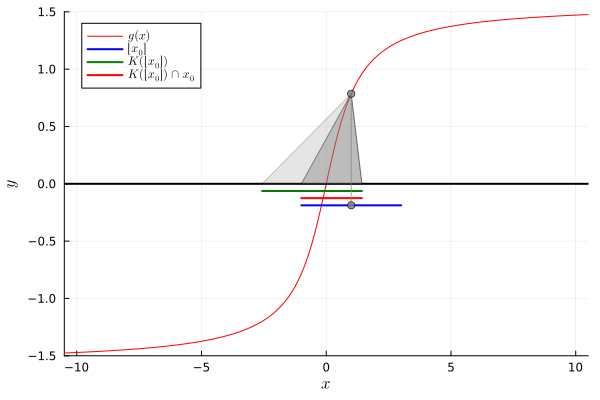

In [8]:
plot(dom_tot, g.(dom_tot), label="\$g(x)\$", color=:red, legend=:topleft,
    xlabel="\$x\$", ylabel="\$y\$") # f(x)
plot!(dom_tot, zero.(dom_tot), label=:none, color=:black, linewidth=2) # eje x
xlims!(dom_tot[1], dom_tot[end])
ylims!(-1.5, 1.5)

#Intervalo [x_0]
plot!([dom0.infimo, dom0.supremo], [y0, y0], label="\$[x_0]\$", color=:blue,
    linewidth=2) # [x_0]

#Intervalo K([x_0])
xmid = midpoint(dom0)
g_xmid = g(xmid)
k0 = K(g, dom0) # K([x_0])
#Para evitar problemas al dibujar con Inf's
if k0.infimo == -Inf
    k0 = -1000 .. k0.supremo
end
if k0.supremo == Inf
    k0 = k0.infimo .. 1000
end
#Posibles intersecciones con el eje x dadas por K([x])
polyg = Shape([(k0.infimo, 0.0), (xmid, g_xmid), (k0.supremo, 0.0)])
plot!(polyg, fillcolor=:grey, label=nothing, alpha=0.2)

#Intervalo [x_1]
dom1 = k0 ∩ dom0
plot!([k0.infimo, k0.supremo], [y1, y1], label="\$K([x_0])\$", color=:green, linewidth=2) # K([x_0])
plot!([dom1.infimo, dom1.supremo], [y2, y2], label="\$K([x_0])\\cap x_0\$", color=:red,
    linewidth=2) # [x_1]
#Intersecciones con el eje x
polyg = Shape([(dom1.infimo, 0.0), (xmid, g_xmid), (dom1.supremo, 0.0)])
plot!(polyg, fillcolor=:grey, label=nothing, alpha=0.4) # Posibles intersecciones eje x

#Punto medio
plot!([xmid, xmid], [y0, g_xmid], color=:gray, linestyle=:dot, markershape=:circle,
    label=nothing, alpha=0.8)

<a id="section_4"></a>
# Comparando método de Newton y de Krawczyk con atan(x)
## Gráfica, diámetro de los operadores, diámetro de la intersección y tiempo de ejecución

Ahora se presenta la gráfica resultante al usar el método de Newton, para lo cual se define el método de Newton intervalar (no extendido) para la misma función

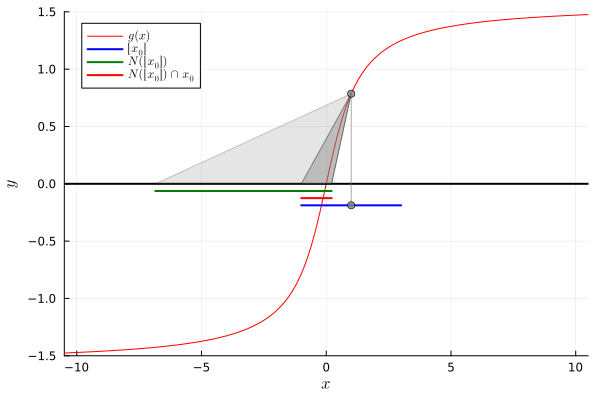

In [9]:
function N(f, dom)
    f′ = ForwardDiff.derivative(f, dom)
    @assert 0 ∉ f′
    m = midpoint(dom)
    md = Intervalo(m)
    Nm = md - f(md)/f′
    return Nm
end

plot(dom_tot, g.(dom_tot), label="\$g(x)\$", color=:red, legend=:topleft,
    xlabel="\$x\$", ylabel="\$y\$") # f(x)
plot!(dom_tot, zero.(dom_tot), label=:none, color=:black, linewidth=2) # eje x
xlims!(dom_tot[1], dom_tot[end])
ylims!(-1.5, 1.5)

#Intervalo [x_0]
plot!([dom0.infimo, dom0.supremo], [y0, y0], label="\$[x_0]\$", color=:blue,
    linewidth=2) # [x_0]

#Intervalo K([x_0])
xmid = midpoint(dom0)
g_xmid = g(xmid)
n0 = N(g, dom0) # K([x_0])
#Para evitar problemas al dibujar con Inf's
if n0.infimo == -Inf
    n0 = -1000 .. n0.supremo
end
if n0.supremo == Inf
    n0 = n0.infimo .. 1000
end
#Posibles intersecciones con el eje x dadas por K([x])
polyg = Shape([(n0.infimo, 0.0), (xmid, g_xmid), (n0.supremo, 0.0)])
plot!(polyg, fillcolor=:grey, label=nothing, alpha=0.2)

#Intervalo [x_1]
dom1 = n0 ∩ dom0
plot!([n0.infimo, n0.supremo], [y1, y1], label="\$N([x_0])\$", color=:green, linewidth=2) # K([x_0])
plot!([dom1.infimo, dom1.supremo], [y2, y2], label="\$N([x_0])\\cap x_0\$", color=:red,
    linewidth=2) # [x_1]
#Intersecciones con el eje x
polyg = Shape([(dom1.infimo, 0.0), (xmid, g_xmid), (dom1.supremo, 0.0)])
plot!(polyg, fillcolor=:grey, label=nothing, alpha=0.4) # Posibles intersecciones eje x

#Punto medio
plot!([xmid, xmid], [y0, g_xmid], color=:gray, linestyle=:dot, markershape=:circle,
    label=nothing, alpha=0.8)

Si bien a primera vista el método de Krawczyk muestra que su operador correspondiente tiene un intervalo menor al el operador de Newton, al momento de hacer la intersección el método de Newton muestra un intervalo mucho menor, lo que es mejor.

In [10]:
diam(K(g,dom0)) < diam(N(g,dom0)) #diametro de los operadores: el de Newton es mayor al de Krawczyk

true

In [11]:
diam(K(g,dom0)∩dom0) < diam(N(g,dom0)∩dom0) #Pero el diametro del operador interseccion el dominio es mayor para Krawczyk

false

Ahora evaluemos el tiempo de ejecución que toma cada operador

In [12]:
#KRAWCZYK

tK1 = now()
K(g,dom0)
tK2 = now()
tK2-tK1

1 millisecond

In [13]:
#NEWTON

tN1 = now()
N(g,dom0)
tN2 = now()
tN2-tN1

0 milliseconds

In [14]:
tN2-tN1 < tK2-tK1

true

Se ve claramente que el método de Newton es más rápido, esto se debe a su composición, ya que el método de Krawczyk requiere llamar y evaluar más funciones que el de Newton, por lo que, toma más tiempo en regresar un resultado

Si bien en este caso la diferencia parece mínima, al usar funciones más complicadas o iterar el operador, este tiempo crecerá de manera importante lo que puede ser un problema en ciertos casos

Ahora definamos un método que busque las raíces de la función usando el método de Krawczyk

<a id="section_5"></a>

# Buscando ceros con Krawczyk

Para buscar las raíces con este método, lo combinaremos con el método de bisección, la idea es primero revisar los intervalos para saber si son menores a la tolerancia y contienen una raíz, si no es asi entonces les aplicaremos el operador de Krawczyk para obtener el intervalo candidato, intervalo que bisectaremos y revisaremos cada subintervalo para ver si tiene interseccion con el dominio (raíz) o no, de alli iremos seleccionando los que contengan raíces en una lista de intervalos candidatos, hasta que el diámetro de los subintervalos (que por ser bisección tienen todos el mismo diámetro asi que elegimos el que sea, en este caso el primero) sea menor a la tolerancia.

Por el teorema mencionado previamente sabemos que de estar contenido ($\subseteq$) el intervalo del operador de Krawczyk en el intervalo que este evalúa, la raíz es punica, por lo que definiremos la unicidad como 
$$
K(f,dom) \subseteq dom
$$


In [6]:
function bisecta(dom::Intervalo)
    m = midpoint(dom)
    return Intervalo(dom.infimo, m), Intervalo(m, dom.supremo)
end

bisecta (generic function with 1 method)

In [7]:
function Kraw(vdom,f, tol)
    for _ in eachindex(vdom)
        dom = popfirst!(vdom) # Extraemos y borramos la primer entrada de `vdom`
        #print(dom)
        vf = f(dom) 
        0 ∉ vf && continue #si no hay raíz en ese intervalo la desechamos 
        if diam(dom) < tol #si hay raíz se corre esta parte del código, evaluamos si el diámetro
        #del subintervalo es menor a la tolerancia, en cuyo caso lo agregamos a al final de vdom
            push!(vdom, dom)   
        else #si es mas grande que la tolerancia, aplicamos Newton al subintervalo
            new_dom = bisecta(K(f,dom)) #nuevos subintervalos Nm dados por Newton extendido    
          #  print(new_dom)
            for Nmi in new_dom #revisamos los subintervalos resultantes
                new_cand = K(f, Nmi) ∩ dom #sacamos la interseccion de cada subintervalo con el dominio
               # print(new_cand)
                isempty(new_cand) && continue #si no se intersectan lo desechamos
                push!(vdom, new_cand) #si se intersectan lo agregamos a vdom como candidato
   # print(vdom)
            end
        end
    end
    return nothing
end

Kraw (generic function with 1 method)

In [8]:
function Kraw_cand(f, dom::Intervalo, tol::AbstractFloat, nmax::Int = 50)
    bz = !(0 ∈ f(dom)) #revisamos que haya raíces
    v_cand = [dom]  # Vector que incluirá al resultado
    its = 0

    while !bz && its<nmax #mientras haya una raíz iteramos
        Kraw(v_cand, f, tol)
       # print(Kraw(v_cand, f, tol))
        
        bz = diam(v_cand[1]) < tol  #a diferencia de biseccion aqui los intervalos
#no siempre tendrán el mismo diámetro, por lo que, se tomará el diámetro máximo de los subintervalos
#para evaluar si son menores a la tolerancia dada
    end

    #Filtra los intervalos que no incluyan al 0 evaluando la función en cada candidato hallado
    vind = findall(0 .∈ f.(v_cand))
    return v_cand[vind] #regresa los subintervalos que incluyen a 0
end

function ceros_Kraw(f, dom::Intervalo, tol::AbstractFloat=1/1024)
    v_cand = Kraw_cand(f, dom, tol)
    if isempty(v_cand)
        unicidad = esmonotona.(f, v_cand)
    else
        unicidad = K(f, v_cand[1]) ⊆ v_cand[1]
    end
    return Raiz.(v_cand, unicidad)
end

ceros_Kraw (generic function with 2 methods)

In [40]:
h(x) = 4*x + 3

thk1 = now()
rr = ceros_Kraw(h, Intervalo(-1,0), 0.25)
thk2 = now()

println(rr)
print(thk2-thk1)

Raiz[Raiz(Intervalo{Float64}(-0.7500000000000003, -0.7499999999999997), true), Raiz(Intervalo{Float64}(-0.7500000000000003, -0.7499999999999997), true)]
429 milliseconds

In [46]:
h(x) = 4*x + 3

thn1 = now()
rrn = ceros_newton(h, Intervalo(-1,0), 0.25)
thn2 = now()



println(rrn)
println(thn2-thn1)
print(0 ∈ ForwardDiff.derivative(h, Intervalo(-1,0)))

Raiz[Raiz(Intervalo{Float64}(-0.7500000000000003, -0.7499999999999997), true)]
447 milliseconds
false

In [32]:
thn2-thn1 < thk2-thk1

false

Aqui es de hecho más eficiente el método de Krawczyk

In [28]:
th0k1 = now()
r = ceros_Kraw(h, Intervalo(1,2), 0.5)
th0k2 = now()

println(r)
print(th0k2-th0k1)

Raiz[]
1 millisecond

In [29]:
th0n1 = now()
rn = ceros_newton(h, Intervalo(1,2), 0.5)
th0n2 = now()

println(rn)
print(th0n2-th0n1)

Raiz[]
0 milliseconds

In [47]:
th0n2-th0n1 < th0k2-th0k1

true

Sin embargo en este caso vuelve a perder contra el método de Newton

<a id="section_6"></a>
# Conclusiones

El método de Krawczyk permite no tener que preocuparse por dividir por el intervalo de la derivada de la función, es un método relativamente sencillo, muy similar al de Newton, que en contextos multivariables permite el análisis de funciones no lineales al no crear puntos fijos atractores en caso de que la derivada sea una matriz no singular.

Es un método más lento que el de Newton (si bien en la mayoría de los casos esto es verdad, no en todos como se vio previamente), en casi una proporción de 2:1 siendo el doble de lento que el de Newton, debido a la cantidad de funciones que debe llamar y evaluar a diferencia de las 3 funciones que usa Newton, Krawczyk usa alrededor de 6 funciones, 5 de ellas diferentes entre sí, lo que afecta su eficiencia.

Si bien no hay que preocuparse porque el 0 se encuentre en el intervalo de la derivada de la función, si hay que tener cuidado con que la derivada de la función evaluada en el punto medio no sea cero, lo cual sigue implicando un problema a considerar

<a id="section_7"></a>
# Bibliografía

- W. Tucker, Validated Numerics: A Short Introduction to Rigorous Computations, Princeton University Press, 2011
-  [Interval Krawczyk and Newton method](https://ww2.ii.uj.edu.pl/~zgliczyn/cap07/krawczyk.pdf),  (20 de Febrero de 2007) Recuperado el 01 de Diciembre de 2022 de https://ww2.ii.uj.edu.pl/~zgliczyn/cap07/krawczyk.pdf.

<a id="section_8"></a>
# Anexo
## Cosas que no han funcionado

Agrego este anexo con pruebas que no funcionaron como modo de fomentar discusión, o bien, corregirlo más adelante

Las raíces múltiples no las encuentra, se queda pasmado y no avanza como se puede ver en las barras de progreso

Además no logré correr el operador Krawczyk para la función $fn(x) = sin(x)-0.1*x^2 + 1$ sin usar IntervalArithmetic, cosa que preferí no hacer por esta ocasión, sin embargo al probar encontré que al usar la librería si corre y se ve la función, no encontré el problema que no permite que ForwardDiff corra la derivada de la función, ya que funciona con intervalos y la función regresa un intervalo al ser evaluada 

A continuación se presenta el código usado y sus respectivos errores

In [ ]:
for i in ProgressBar(1:100000)
    hn(x) =  (x+5)^2 + x
    rr = ceros_Kraw(hn, Intervalo(-8,-2))
    
end

0.0%┣                                      ┫ 0/100.0k [00:00<-1:-23:-20, -0s/it]

In [ ]:
for i in ProgressBar(1:100000)
# Una raíz múltiple
    h4(x) = x*(x^3+1.5^3)^2
    rr4 = ceros_Kraw(h4, Intervalo(-10,21), 1/2^20)
end

0.0%┣                                      ┫ 0/100.0k [00:00<-1:-23:-21, -0s/it]

In [16]:
import Base: sin
sin(x::Intervalo) = Intervalo(min(sin(x.infimo),sin(x.supremo)), max(sin(x.infimo),sin(x.supremo)))

sin (generic function with 17 methods)

In [29]:
sin(Intervalo(-6,6))-0.1*Intervalo(-6,6)^2+1

Intervalo{Float64}(-2.879415498198928, 1.279415498198926)

In [40]:
fn(x) = sin(x)-0.1*x^2 + 1
dom_tot = -10:0.125:10
dom0n = Intervalo(-6,6)
y0 = -3/16
y1 = -1/16
y2 = -2/16


-0.125

In [59]:
fmi′ = ForwardDiff.derivative(fn, Intervalo(-6,0))
# m = midpoint(dom) #Necesita el punto medio del intervalo en forma escalar para la derivada evaluada en ese punto
# fm′ = ForwardDiff.derivative(f, m)
# r = rad(dom)
# rm = Intervalo(-r,r)
# md = Intervalo(m)
# @assert 0 != fm′
# Km = md - f(md)/fm′-(1-(f′/fm′))*rm

LoadError: MethodError: no method matching AbstractFloat(::Intervalo{Float64})
[0mClosest candidates are:
[0m  (::Type{T})(::Real, [91m::RoundingMode[39m) where T<:AbstractFloat at rounding.jl:200
[0m  (::Type{T})(::T) where T<:Number at boot.jl:772
[0m  (::Type{T})([91m::AbstractChar[39m) where T<:Union{AbstractChar, Number} at char.jl:50
[0m  ...

In [18]:
plot(dom_tot, f.(dom_tot), label="\$g(x)\$", color=:red, legend=:topleft,
    xlabel="\$x\$", ylabel="\$y\$") # f(x)
plot!(dom_tot, zero.(dom_tot), label=:none, color=:black, linewidth=2) # eje x
xlims!(dom_tot[1], dom_tot[end])
ylims!(-1.5, 1.5)

#Intervalo [x_0]
plot!([dom0.infimo, dom0.supremo], [y0, y0], label="\$[x_0]\$", color=:blue,
    linewidth=2) # [x_0]

#Intervalo K([x_0])
xmid = midpoint(dom0)
g_xmid = f(xmid)
n0 = K(f, dom0) # K([x_0])
#Para evitar problemas al dibujar con Inf's
if n0.infimo == -Inf
    n0 = -1000 .. n0.supremo
end
if n0.supremo == Inf
    n0 = n0.infimo .. 1000
end
#Posibles intersecciones con el eje x dadas por K([x])
polyg = Shape([(n0.infimo, 0.0), (xmid, g_xmid), (n0.supremo, 0.0)])
plot!(polyg, fillcolor=:grey, label=nothing, alpha=0.2)

#Intervalo [x_1]
dom1 = n0 ∩ dom0
plot!([n0.infimo, n0.supremo], [y1, y1], label="\$K([x_0])\$", color=:green, linewidth=2) # K([x_0])
plot!([dom1.infimo, dom1.supremo], [y2, y2], label="\$K([x_0])\\cap x_0\$", color=:red,
    linewidth=2) # [x_1]
#Intersecciones con el eje x
polyg = Shape([(dom1.infimo, 0.0), (xmid, g_xmid), (dom1.supremo, 0.0)])
plot!(polyg, fillcolor=:grey, label=nothing, alpha=0.4) # Posibles intersecciones eje x

#Punto medio
plot!([xmid, xmid], [y0, g_xmid], color=:gray, linestyle=:dot, markershape=:circle,
    label=nothing, alpha=0.8)

LoadError: MethodError: no method matching AbstractFloat(::Intervalo{Float64})
[0mClosest candidates are:
[0m  (::Type{T})(::Real, [91m::RoundingMode[39m) where T<:AbstractFloat at rounding.jl:200
[0m  (::Type{T})(::T) where T<:Number at boot.jl:772
[0m  (::Type{T})([91m::AbstractChar[39m) where T<:Union{AbstractChar, Number} at char.jl:50
[0m  ...